<a href="https://colab.research.google.com/github/Armandkay/ml-image-pipeline/blob/main/ml_image_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Image Pipeline: Fashion-MNIST (CNN + MLOps Preparation)

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Check versions
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


## 1. Load and Preprocess Fashion-MNIST Dataset

In [2]:

# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dims for CNN
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


## 2. Visualize Sample Images

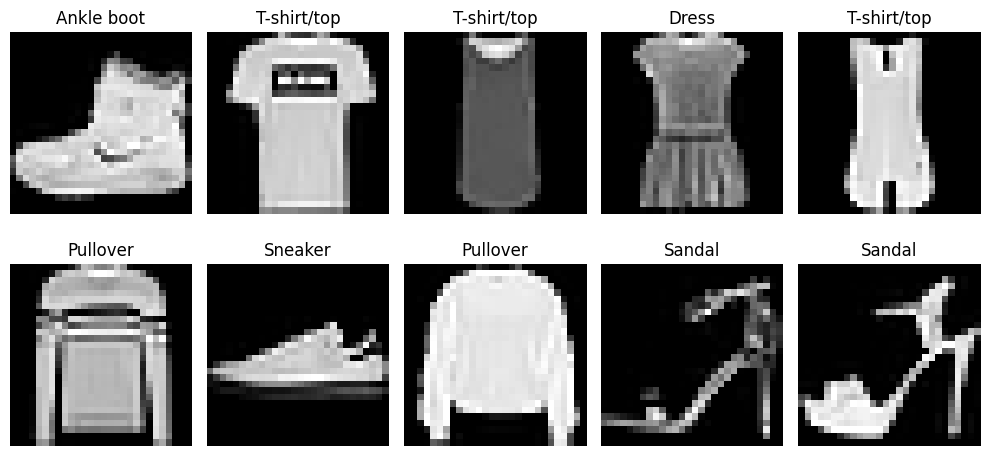

In [3]:

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].squeeze(), cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()


## 3. Build CNN Model

In [4]:

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Train Model

In [5]:

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.7410 - loss: 0.7100 - val_accuracy: 0.8722 - val_loss: 0.3409
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.8726 - loss: 0.3465 - val_accuracy: 0.8900 - val_loss: 0.2933
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.8929 - loss: 0.2949 - val_accuracy: 0.8922 - val_loss: 0.2884
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9035 - loss: 0.2647 - val_accuracy: 0.9015 - val_loss: 0.2586
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9130 - loss: 0.2367 - val_accuracy: 0.9108 - val_loss: 0.2440
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9183 - loss: 0.2197 - val_accuracy: 0.9147 - val_loss: 0.2315
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.9272 - loss: 0.1967 - val_accuracy: 0.9160 - val_loss: 0.2284
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9301 -

## 5. Evaluate Model

In [6]:

loss, acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", acc)

# Predictions & Metrics
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9067 - loss: 0.2736
Test Accuracy: 0.9092000126838684
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.94      0.75      0.83      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.87      0.88      0.87      1000
       Dress       0.93      0.90      0.91      1000
        Coat       0.86      0.86      0.86      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.67      0.83      0.74      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



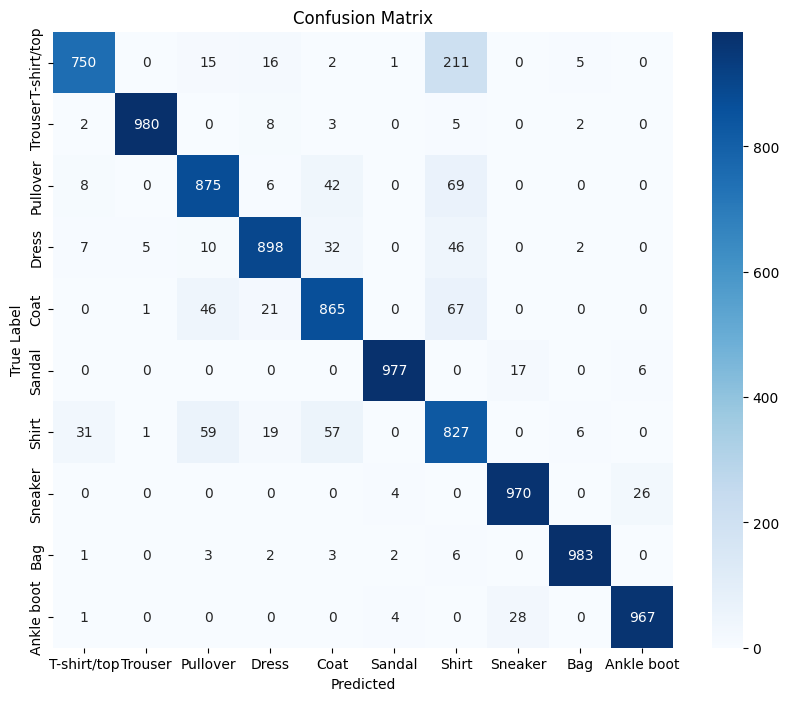

In [7]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## 6. Save Trained Model

In [8]:

model.save("models/model.h5")
print("Model saved to models/model.h5")


Model saved to models/model.h5


## 7. Save Sample Test Images (Optional for UI/API Testing)

In [9]:

import os
import cv2

os.makedirs("data/test/T-shirt", exist_ok=True)
count = 0
for i in range(len(x_test)):
    if y_test[i] == 0:  # Class 0 = T-shirt
        img_path = f"data/test/T-shirt/sample_{count}.png"
        cv2.imwrite(img_path, (x_test[i].squeeze() * 255).astype("uint8"))
        count += 1
    if count >= 5:
        break
print("Saved 5 sample T-shirt test images to data/test/T-shirt")


Saved 5 sample T-shirt test images to data/test/T-shirt
